In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/14376454225_a1de336c5b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/13968424321_1d89b33a9f_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16970837587_4a9d8500d7.jpg'),
 PosixPath('datasets/flower_photos/dandelion/18276105805_d31d3f7e71.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14375349004_68d893254a_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg'),
 PosixPath('datasets/flower_photos/roses/3104672186_5f75647448_n.jpg'),
 PosixPath('datasets/flower_photos/roses/145862135_ab710de93c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg')]

In [9]:
PIL.Image.open(str(roses[1]))

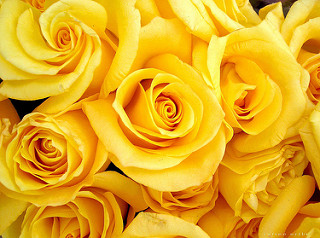

In [10]:
PIL.Image.open(str(roses[3]))

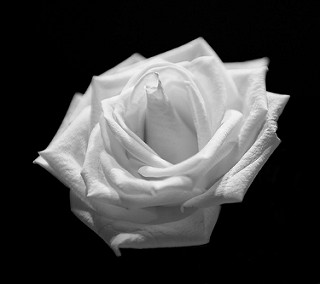

In [11]:
PIL.Image.open(str(roses[8]))

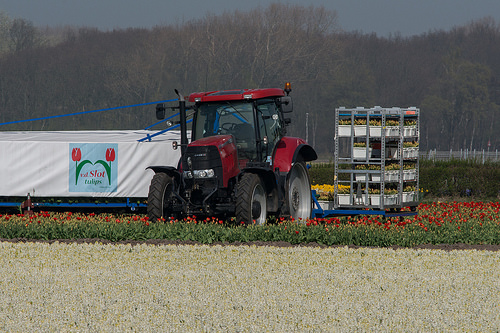

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

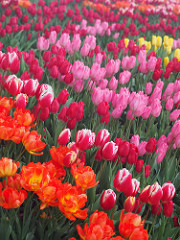

In [13]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

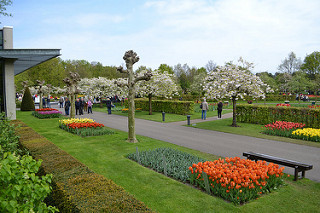

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[15]))

**Read flowers images from disk into numpy array using opencv** 

In [15]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [17]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/505517255_cfbb6f6394.jpg'),
 PosixPath('datasets/flower_photos/roses/3104672186_5f75647448_n.jpg'),
 PosixPath('datasets/flower_photos/roses/145862135_ab710de93c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg')]

In [18]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14510185271_b5d75dd98e_n.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['sunflowers'][0]))

In [20]:
img.shape

(375, 500, 3)

In [21]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


**#Preprocessing The Model**

In [25]:
#Preprocessing: scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
#Build convolutional neural network and train it
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)   


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 50s 553ms/step - accuracy: 0.3411 - loss: 1.5051
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 561ms/step - accuracy: 0.5680 - loss: 1.0672
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 556ms/step - accuracy: 0.6611 - loss: 0.8835
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 556ms/step - accuracy: 0.7073 - loss: 0.7611
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 558ms/step - accuracy: 0.8296 - loss: 0.4743
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 563ms/step - accuracy: 0.9120 - loss: 0.2862
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 555ms/step - accuracy: 0.9509 - loss: 0.1571
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 564ms/step - accuracy: 0.9768 - loss: 0.0821
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 550ms/step - accuracy: 0.9915 - loss: 0.0422
Epoch 10/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48s 554ms/step - accuracy: 0.9917 - loss: 0.0426
Epoch 11/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 47s 549ms/step - accuracy: 0.9903 - loss: 0.0354
Epoch 12/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 48

**Prediction Of Flower Data Augmentation Model**

In [27]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step


array([[  2.655274  ,  38.99925   ,  -0.75887257,  -6.2678013 ,
          7.930945  ],
       [ 25.318476  ,   0.093969  ,   4.993437  , -16.051477  ,
         17.145462  ],
       [  5.650654  ,   4.003048  ,  15.838334  ,  -8.595462  ,
          1.6108171 ],
       ...,
       [  4.2246222 ,  -3.82234   ,  -2.2894433 ,  10.064112  ,
          5.450417  ],
       [ 20.543081  ,   2.9740937 ,  -0.58351713,  -5.161844  ,
         33.650856  ],
       [ -5.36313   ,  -5.6659336 ,   1.6852975 ,  17.973461  ,
         -3.2684503 ]], dtype=float32)

In [28]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6444179e-16, 1.0000000e+00, 5.4108717e-18, 2.1916401e-20,
       3.2151924e-14], dtype=float32)>

In [29]:
np.argmax(score)

1

**Testing The Model**

first  i split  flower image dataset into training and testing sets, apply various augmentation techniques to the training data (like rotation, cropping, color jittering), train a machine learning model on the augmented data, then evaluate its performance on the unaugmented testing set by measuring metrics like accuracy for testing the model we use x,y testing functions.

In [30]:
y_test[0]

1

In [31]:
X_test[0]

array([[[ 10, 109, 118],
        [  7,  98, 109],
        [ 15, 100, 115],
        ...,
        [  2,  67,  49],
        [  1,  66,  45],
        [  0,  64,  43]],

       [[ 12, 109, 119],
        [ 10, 100, 111],
        [ 14,  99, 115],
        ...,
        [  1,  67,  48],
        [  1,  66,  45],
        [  0,  64,  43]],

       [[ 10, 104, 114],
        [ 12, 101, 115],
        [ 14, 102, 118],
        ...,
        [  0,  67,  46],
        [  1,  66,  45],
        [  0,  64,  43]],

       ...,

       [[ 30, 112, 125],
        [ 32, 114, 126],
        [ 31, 115, 127],
        ...,
        [  2,  75,  49],
        [  1,  72,  45],
        [  2,  71,  44]],

       [[ 29, 110, 123],
        [ 30, 111, 123],
        [ 30, 112, 124],
        ...,
        [  2,  75,  49],
        [  2,  73,  46],
        [  3,  72,  45]],

       [[ 30, 109, 122],
        [ 30, 109, 122],
        [ 31, 110, 123],
        ...,
        [  3,  77,  49],
        [  2,  74,  47],
        [  3,  74,  45]]

**Tranning The Model**

To train a flower image augmentation model in AI/ML using x_train and y_train commands, you would typically:
               Split flower images into x_train (features - the flower images) and y_train (labels - the corresponding flower species) arrays.

In [32]:
y_train

array([2, 0, 1, ..., 2, 3, 3])

In [33]:
X_train

array([[[[  2,   4,   4],
         [  2,   4,   4],
         [  2,   4,   4],
         ...,
         [ 10,  21,  19],
         [ 10,  21,  19],
         [  9,  20,  18]],

        [[  2,   4,   4],
         [  2,   4,   4],
         [  2,   4,   4],
         ...,
         [ 10,  21,  19],
         [  9,  20,  18],
         [  9,  20,  18]],

        [[  2,   4,   4],
         [  2,   4,   4],
         [  2,   4,   4],
         ...,
         [ 10,  21,  19],
         [  9,  20,  18],
         [  9,  20,  18]],

        ...,

        [[  1,  27,  21],
         [  3,  26,  21],
         [  0,  23,  15],
         ...,
         [  7,  23,  16],
         [  3,  22,  15],
         [  4,  24,  16]],

        [[  2,  25,  20],
         [  3,  25,  20],
         [  1,  22,  14],
         ...,
         [  7,  23,  17],
         [  4,  23,  16],
         [  5,  27,  19]],

        [[  1,  24,  19],
         [  3,  24,  19],
         [  2,  20,  14],
         ...,
         [  8,  23,  19],
        

In [34]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomZoom(0.3),  # Adjust the zoom factor as needed
])

print(data_augmentation)


<Sequential name=sequential_1, built=False>


In [35]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define your image dimensions
img_height = 224  # Replace with your image height
img_width = 224   # Replace with your image width

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

print(data_augmentation)


<Sequential name=sequential_2, built=True>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


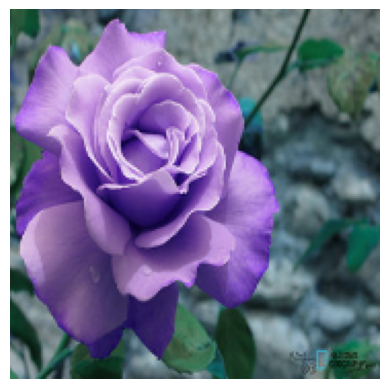

In [36]:
plt.axis('off')
plt.imshow(X[0])

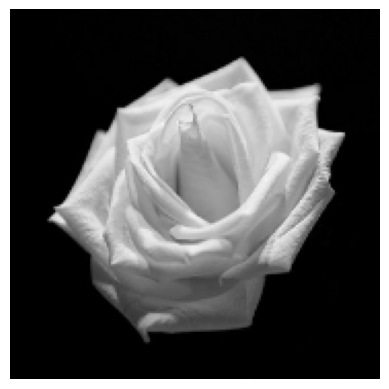

In [37]:
plt.axis('off')
plt.imshow(X[8])

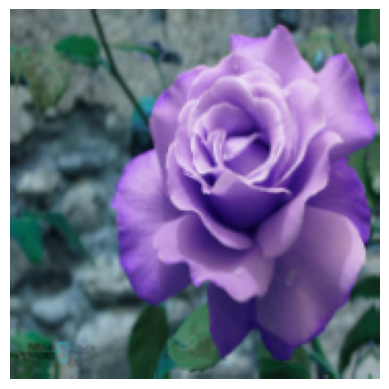

In [38]:
#Newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [39]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Define input dimensions and number of classes
img_height = 180
img_width = 180
num_classes = 5

# Data augmentation
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

# Define the model
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling2D(),  # Replaces Flatten
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Fit the model
model.fit(X_train_scaled, y_train, epochs=30)
  

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 56s 631ms/step - accuracy: 0.3069 - loss: 1.5361
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 628ms/step - accuracy: 0.4530 - loss: 1.2610
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 53s 616ms/step - accuracy: 0.5075 - loss: 1.1902
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 626ms/step - accuracy: 0.5267 - loss: 1.1413
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 53s 613ms/step - accuracy: 0.5605 - loss: 1.0730
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 53s 616ms/step - accuracy: 0.5708 - loss: 1.0339
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 624ms/step - accuracy: 0.5943 - loss: 0.9986
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 53s 619ms/step - accuracy: 0.6140 - loss: 0.9702
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 55s 636ms/step - accuracy: 0.6023 - loss: 0.9948
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 54s 625ms/step - accuracy: 0.6361 - loss: 0.9200
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 626ms/step - accuracy: 0.6334 - loss: 0.9475
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 54